<a href="https://colab.research.google.com/github/paradox133/AI_ML_DataAnalysis_DataVisualization_Classic-Examples/blob/master/nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non linear regression / curve fitting

You'll find more information and detailed explainations on [my blog](https://lucidar.me/en/neural-networks/curve-fitting-nonlinear-regression/).

[Video of the expected result](https://youtu.be/7z86Lxzf_2o)


## Check/install TensorFlow version
**Must be version 2.1.0**


In [1]:
# Switch the TensorFlow version 2.1
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 24kB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 450kB 46.0MB/s 
     |████████████████████████████████| 3.9MB 44.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=fe0b326787dc78a322d87b1c11261cb6f178d65930ce66a481b74c75a432779f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninsta

## Import libraries and create noisy data



In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow import keras
from google.colab import files
import tensorflow as tf
import math

print ('TensorFlow version: ' + tf.__version__)

# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

TensorFlow version: 2.1.0
Data created successfully


## Display curve to fit

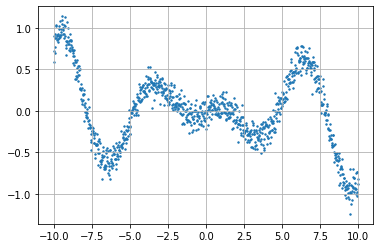

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [3]:
# Display the dataset
plt.scatter(x_data[::1], y_data[::1], s=2)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
files.download('dataset.png') 

# Create the model
Create the model with two 64 units hidden layers.

In [6]:
# Create the model 
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


## Training over 100 epochs

In [7]:
# Training
model.fit( x_data, y_data, epochs=100, verbose=1)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 342us/sample - loss: 0.2188
Epoch 2/100
1000/1000 [==============================] - 0s 54us/sample - loss: 0.1865
Epoch 3/100
1000/1000 [==============================] - 0s 67us/sample - loss: 0.1806
Epoch 4/100
1000/1000 [==============================] - 0s 62us/sample - loss: 0.1940
Epoch 5/100
1000/1000 [==============================] - 0s 61us/sample - loss: 0.1817
Epoch 6/100
1000/1000 [==============================] - 0s 55us/sample - loss: 0.1927
Epoch 7/100
1000/1000 [==============================] - 0s 52us/sample - loss: 0.1872
Epoch 8/100
1000/1000 [==============================] - 0s 55us/sample - loss: 0.1854
Epoch 9/100
1000/1000 [==============================] - 0s 62us/sample - loss: 0.1874
Epoch 10/100
1000/1000 [==============================] - 0s 52us/sample - loss: 0.1794
Epoch 11/100
1000/1000 [==============================] - 0s 54us/sample - loss: 0.1819
Epoch 12/100
1000/

# Predict and display

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

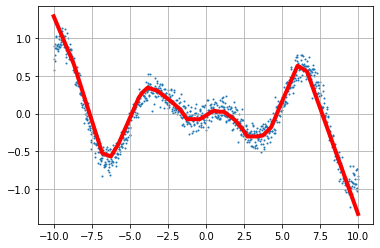

In [8]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1], s=1)
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
files.download("training.png") 

## Create image sequence for the video

Run this section to generate a sequence of images for the [video](https://www.youtube.com/watch?v=7z86Lxzf_2o).

To get the video from the beginning, you have to reset the model weight. Re-creating the model should reseting the weights.

In [9]:
for x in range(100):
  # One epoch
  model.fit( x_data, y_data, epochs=1, verbose=1)

  # Compute the output 
  y_predicted = model.predict(x_data)

  # Display the result
  plt.scatter(x_data[::1], y_data[::1], s=2)
  plt.plot(x_data, y_predicted, 'r', linewidth=4)
  plt.grid()
  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
  plt.ylim(bottom=-1.2)  
  #plt.show()
  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
  files.download('training-' + str(x) +'-epochs.png') 
  plt.clf()



Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0162


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0170


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0164


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0149


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 58us/sample - loss: 0.0168


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 57us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 58us/sample - loss: 0.0162


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0168


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0187


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0165


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0168


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 70us/sample - loss: 0.0149


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0163


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0170


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 66us/sample - loss: 0.0156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0149


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0147


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0159


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0171


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0158


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0150


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0152


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0177


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0144


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0162


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0161


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0166


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0153


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0165


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0186


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0152


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0178


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0167


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 59us/sample - loss: 0.0145


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0173


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0174


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 64us/sample - loss: 0.0179


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0137


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0134


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 61us/sample - loss: 0.0137


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0144


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0139


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0144


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0186


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0152


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0155


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0139


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0142


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0154


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 55us/sample - loss: 0.0142


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0142


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0138


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 50us/sample - loss: 0.0138


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 60us/sample - loss: 0.0148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0156


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0149


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 66us/sample - loss: 0.0140


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0151


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0145


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0137


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0140


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0157


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0142


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0145


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0145


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0135


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0131


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0132


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 53us/sample - loss: 0.0140


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train on 1000 samples
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0149


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>